# IRIS FLOWER CLASSIFICATION

The Iris flower dataset is well-known in machine learning. It has measurements of iris flowers like their petal length, width,
etc., categorized into three species: setosa, versicolor, and virginica. The job is to teach a computer program using this
data so it can recognize which species an iris flower belongs to based on its measurements.

# Importing libraries required

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

# Reading the dataset

In [2]:
iris_dataset = pd.read_csv("Iris.csv")
iris_dataset = iris_dataset.drop(columns=["Id"])

# Viewing the dataset

In [3]:
iris_dataset.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris_dataset.tail(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Describing the dataset

In [5]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris_dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Getting no. of rows and columns in the dataset

In [7]:
print("Dimensions of dataset are: ",iris_dataset.shape)

Dimensions of dataset are:  (150, 5)


# Counting the no. of entry for each Species¶

In [8]:
print("Number of flowers in each species",iris_dataset.value_counts("Species"))

Number of flowers in each species Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


# Data Visualization

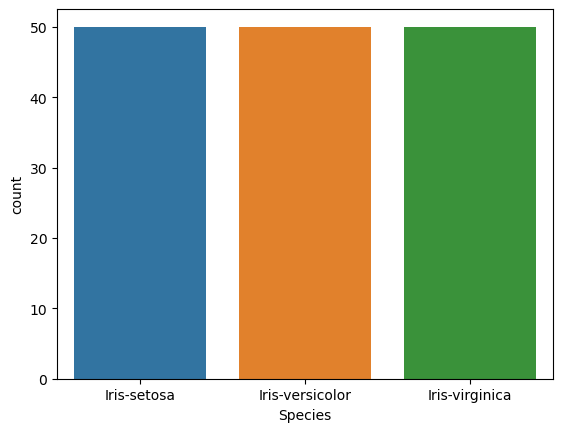

In [9]:
#count plot to see the count of each species
sns.countplot(x='Species', data=iris_dataset)
plt.show()

In [10]:
color = ['pink','orchid','purple']
Species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
columns = ["PetalWidthCm","PetalLengthCm","SepalWidthCm","SepalLengthCm"]

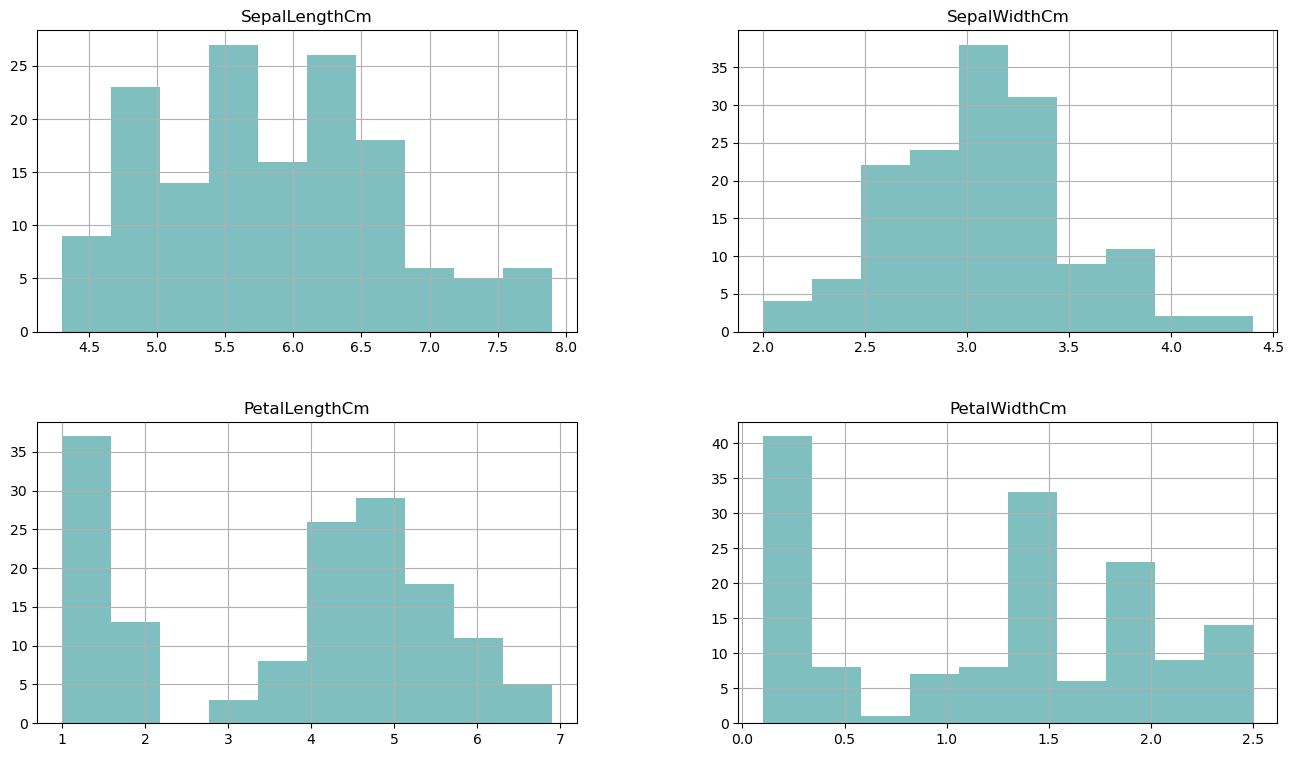

In [11]:
iris_dataset.hist(figsize=(16,9),color="teal",alpha=0.5)
plt.show()

PetalWidthCm
PetalLengthCm
SepalWidthCm
SepalLengthCm


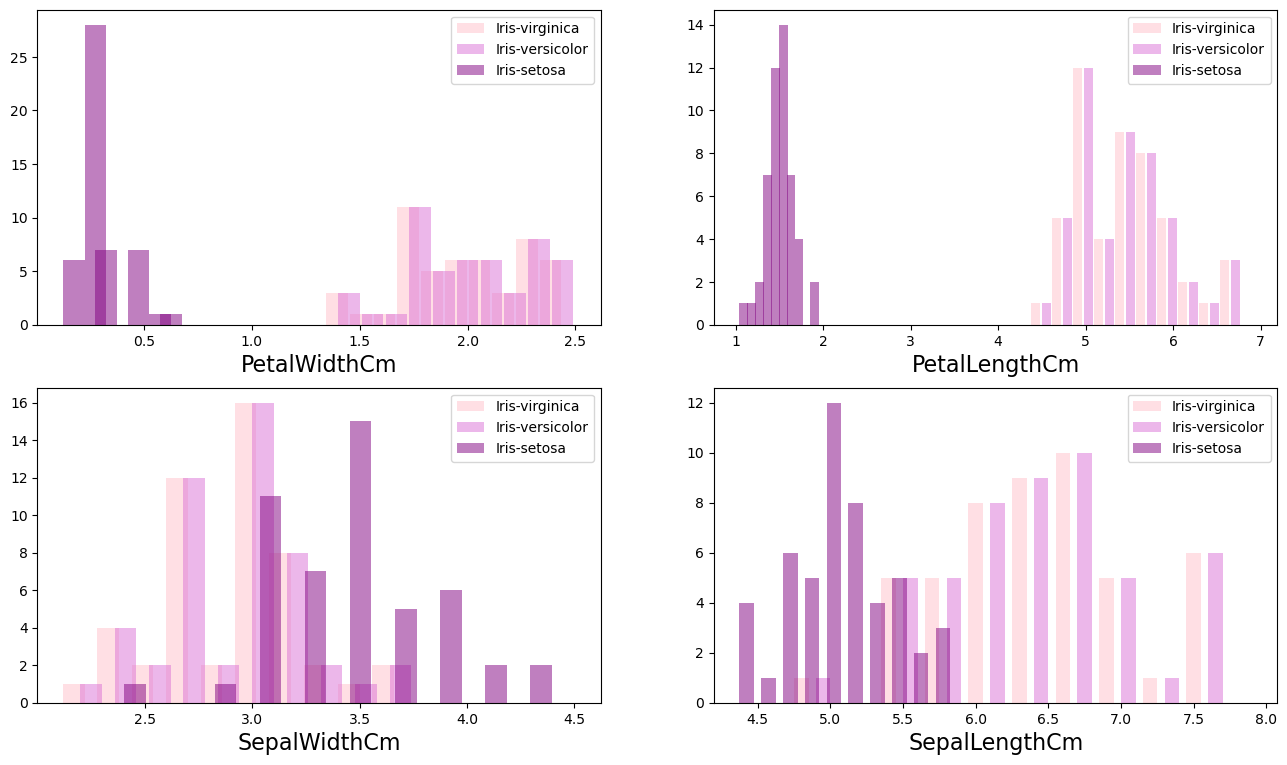

In [12]:
# Having a look at the distribution of features which have null/missing values
plt.figure(figsize=(16,9))
s1 = iris_dataset.loc[iris_dataset['Species'] == Species[0]]
s2 = iris_dataset.loc[iris_dataset['Species'] == Species[1]]
s3 = iris_dataset.loc[iris_dataset['Species'] == Species[2]]

for index, var in enumerate(columns):
    print(var)
    plt.subplot(2,2,index+1)
    plt.hist(s1[var],width=0.1,alpha=0.5,color=color[0],align ='left',label=Species[0])
    plt.hist(s1[var],width=0.1,alpha=0.5,color=color[1],align ='mid',label=Species[1])
    plt.hist(s3[var],width=0.1,alpha=0.5,color=color[2],align ='right',label=Species[2])
    plt.xlabel(var,fontdict={"fontsize":16})
    plt.legend()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


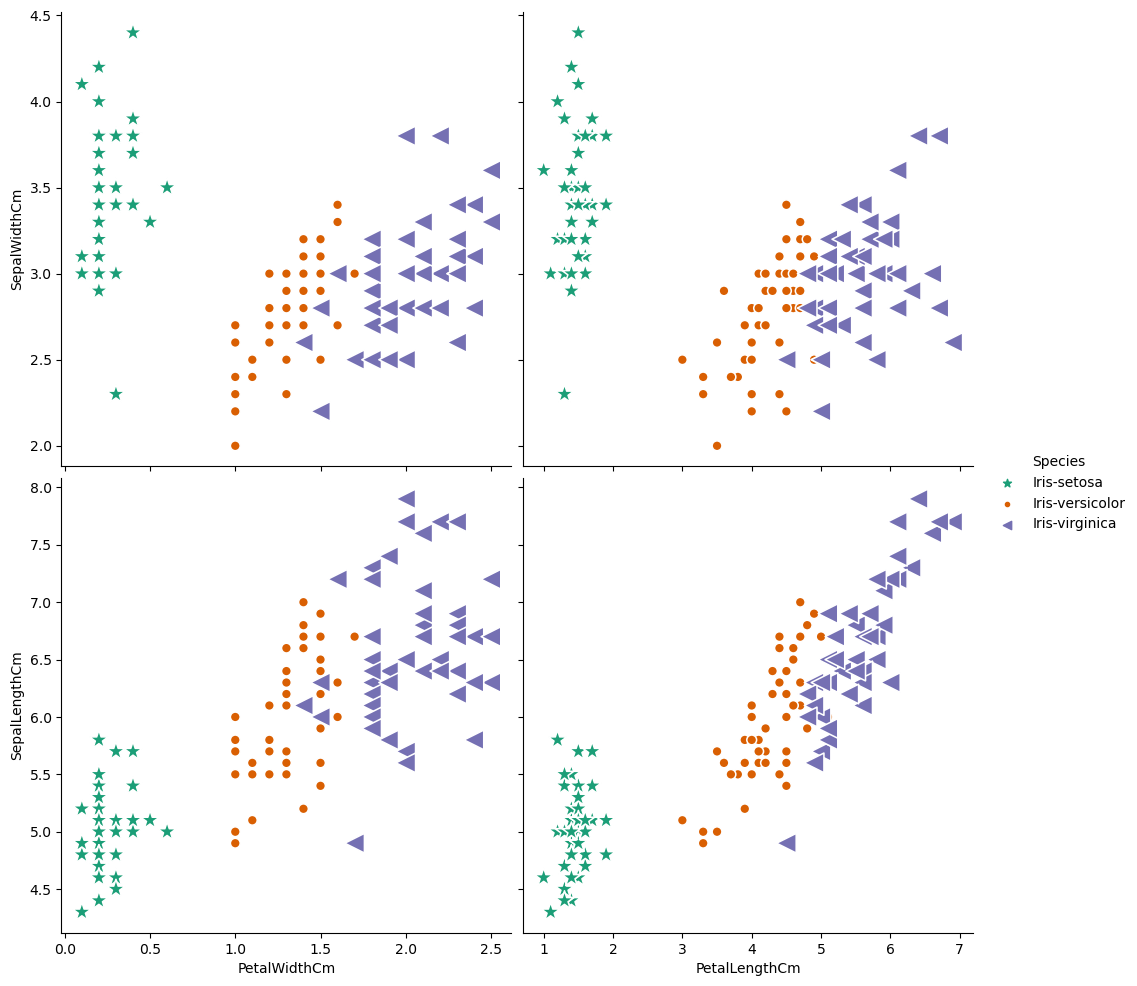

In [13]:
sns.pairplot(iris_dataset, x_vars=columns[:2], y_vars=columns[2:],hue="Species",height=5,plot_kws={"s":200},markers=['*','.','<'] , palette='Dark2')
plt.show()

Text(0, 0.5, 'frequency')

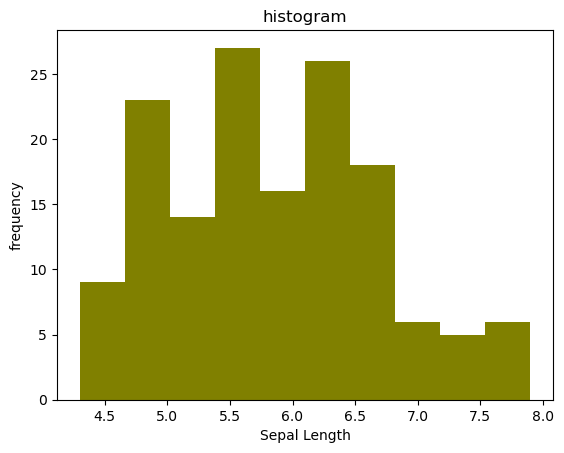

In [14]:
plt.hist(iris_dataset['SepalLengthCm'],color='olive')
plt.title("histogram")
plt.xlabel("Sepal Length")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

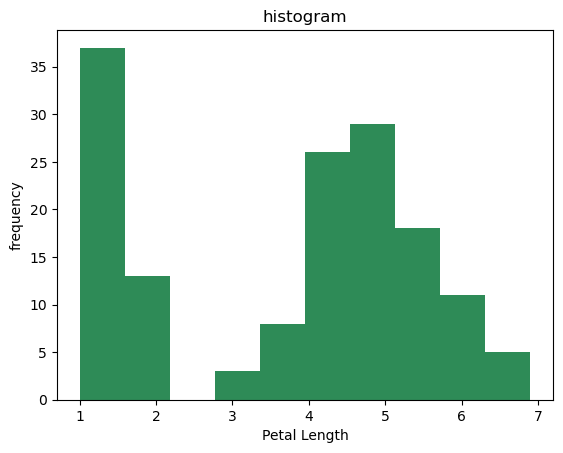

In [15]:
plt.hist(iris_dataset['PetalLengthCm'],color = 'seagreen')
plt.title("histogram")
plt.xlabel("Petal Length")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

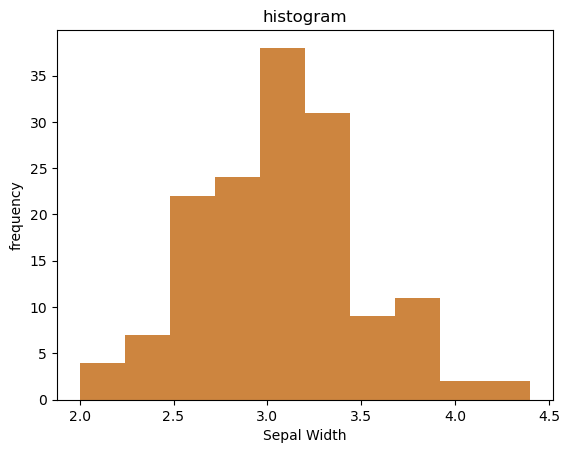

In [16]:
plt.hist(iris_dataset['SepalWidthCm'],color='peru')
plt.title("histogram")
plt.xlabel("Sepal Width")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

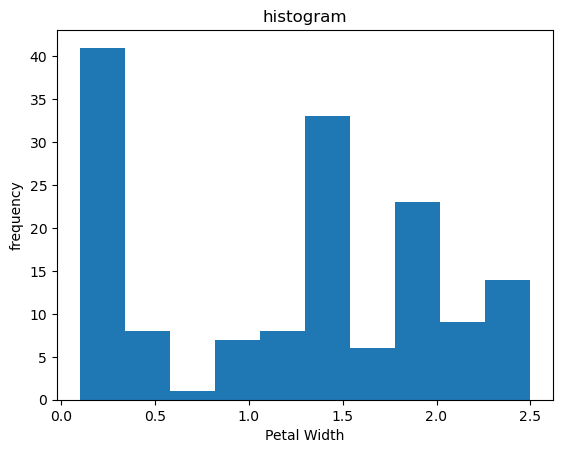

In [17]:
plt.hist(iris_dataset['PetalWidthCm'])
plt.title("histogram")
plt.xlabel("Petal Width")
plt.ylabel("frequency")

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

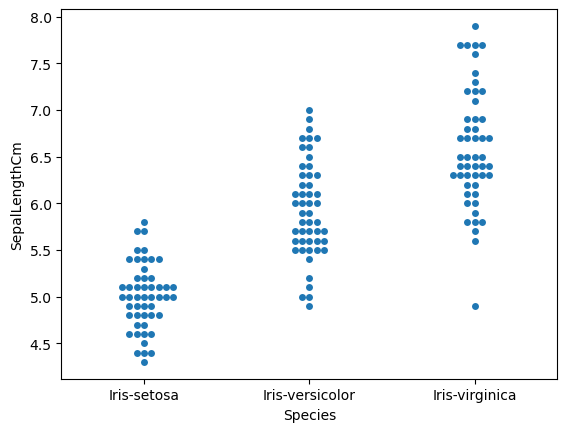

In [19]:
sns.swarmplot(x='Species',y='SepalLengthCm',data=iris_dataset)

# Relation between variables

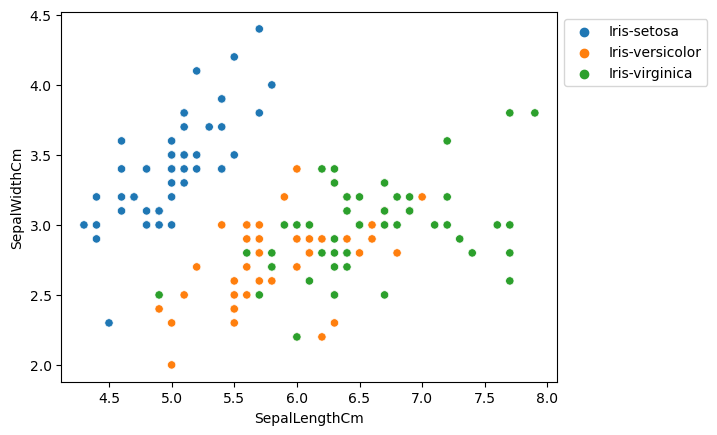

In [20]:
#the plot between sepallength and sepal width by plotting a Scatter plot between them.
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris_dataset )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
#To display the plot
plt.show()

From the above plot we can draw the following conclusions:
1. The species "Iris- Setosa" have larger sepal_width but smaller sepal_length when compared.
2. The species "Iris-versicolor" have smaller sepal_width and sepal_length when compared to other two and lies between.
3. The species "Iris-virginica" have larger sepal_length but smaller sepal_width when compared.

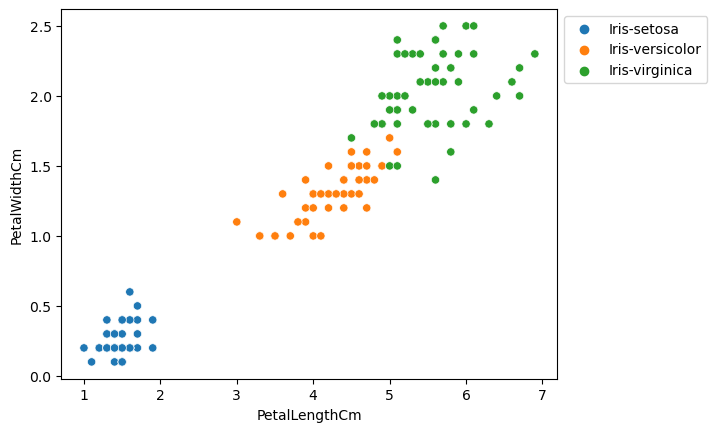

In [21]:
# the plot between petal length and petal width by plotting a Scatter plot between them.
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=iris_dataset )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
#To display the plot
plt.show()

From the above plot we can draw some conclusions like:
1. The species "Iris-setosa" has smaller petal_width and petal length when compared.
2. The species "Iris-versicolor" have measurements middle of setosa and versicolor.
3. The species "Iris-virginica" have larger petal length and petal width when compared.

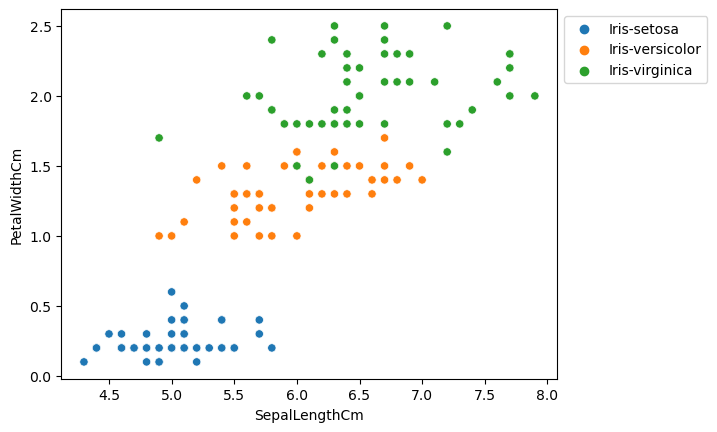

In [22]:
#the plot between sepallength and petal width by plotting a Scatter plot between them.
sns.scatterplot(x='SepalLengthCm', y='PetalWidthCm', hue='Species', data=iris_dataset )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
#To display the plot
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


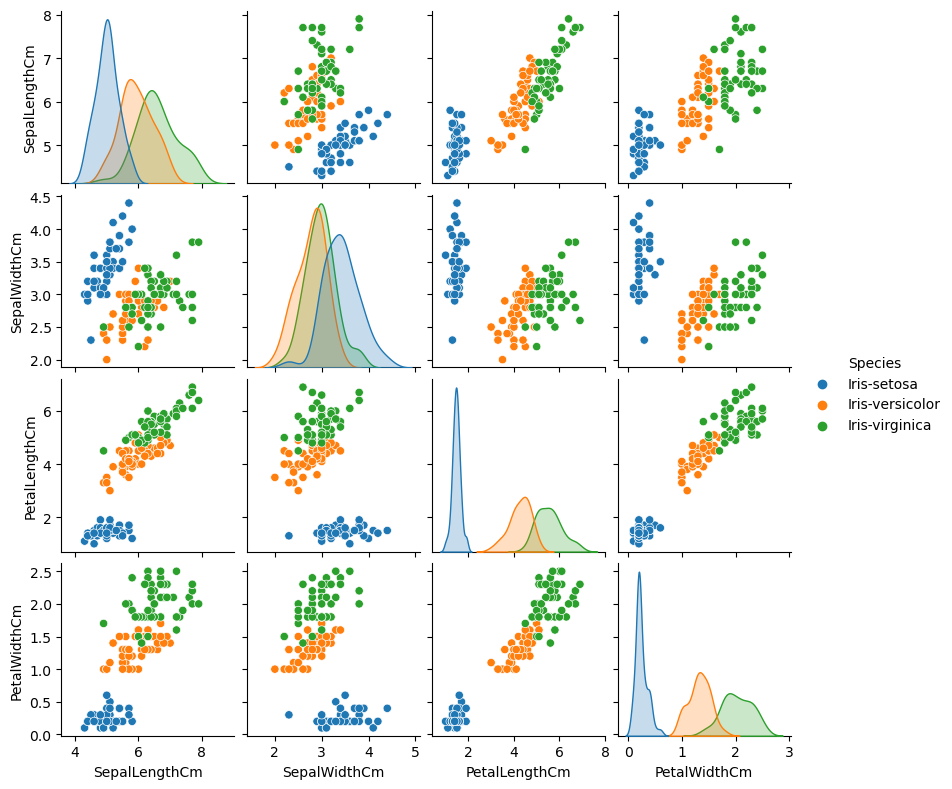

In [23]:
#Multivariate analysis
#Pairplot which shows the pair-wise relation between every attributes
sns.pairplot(iris_dataset,hue='Species', height=2)

# Machine Learning Model implementation

Spliting the dataset into test, train parts

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = iris_dataset.drop(columns = ["Species"])
Y = iris_dataset['Species']
x_train, x_test,y_train, y_test = train_test_split(X ,Y ,test_size = 0.25)

# Importing the Logistic Regression model

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Training the model

In [27]:
model.fit(x_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_predict = model.predict(x_test)

In [29]:
y_predict

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

# Decision Tree : ID3 decision tree classifier

ID3 stands for Iterative Dichotomiser 3 and is named such because the algorithm iteratively (repeatedly) dichotomizes(divides) 
features into two or more groups at each step.
ID3 tree is mainly used for classification problems with nominal features only.

In [30]:
#Importing library foe decision classifier
from sklearn.tree import DecisionTreeClassifier
id3=DecisionTreeClassifier(criterion='entropy')
#Fit the data
k=id3.fit(x_train,y_train)
#predict the data
y_predict=id3.predict(x_test)
print(y_predict)

['Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa']


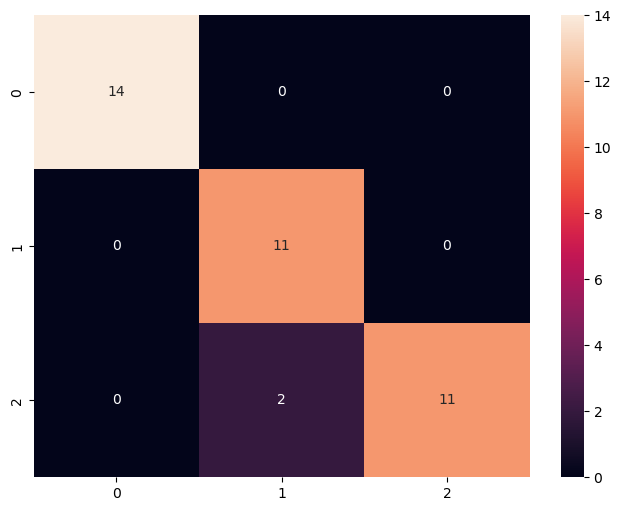

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cn_mat = confusion_matrix(y_predict, y_test)

plt.figure(figsize=(8,6))
sns.heatmap(cn_mat, annot=True)
plt.show()

Model accuracy score represents the model’s ability to correctly predict both the positives and negatives out of all 
the predictions.
Mathematically, it represents the ratio of sum of true positive and true negatives out of all the predictions.
**Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)

Accuracy score is calculated between predicted output value and test value Model score is calculated
between output and input values of testing.

In [33]:
#Accuracy score and model score
print(classification_report(y_predict,y_test))
print('accuracy-score',accuracy_score(y_predict,y_test))
print('Model score',id3.score(x_test,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.85      1.00      0.92        11
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.94        38
   weighted avg       0.96      0.95      0.95        38

accuracy-score 0.9473684210526315
Model score 0.9473684210526315


In [34]:
print(f"Accuracy of the model is :- {int(model.score(x_test, y_test)*100)}%")

Accuracy of the model is :- 94%


In [35]:
X_new = np.array([[3, 2, 1, 0.2], [4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.9]])
#Prediction of the species
prediction = id3.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
